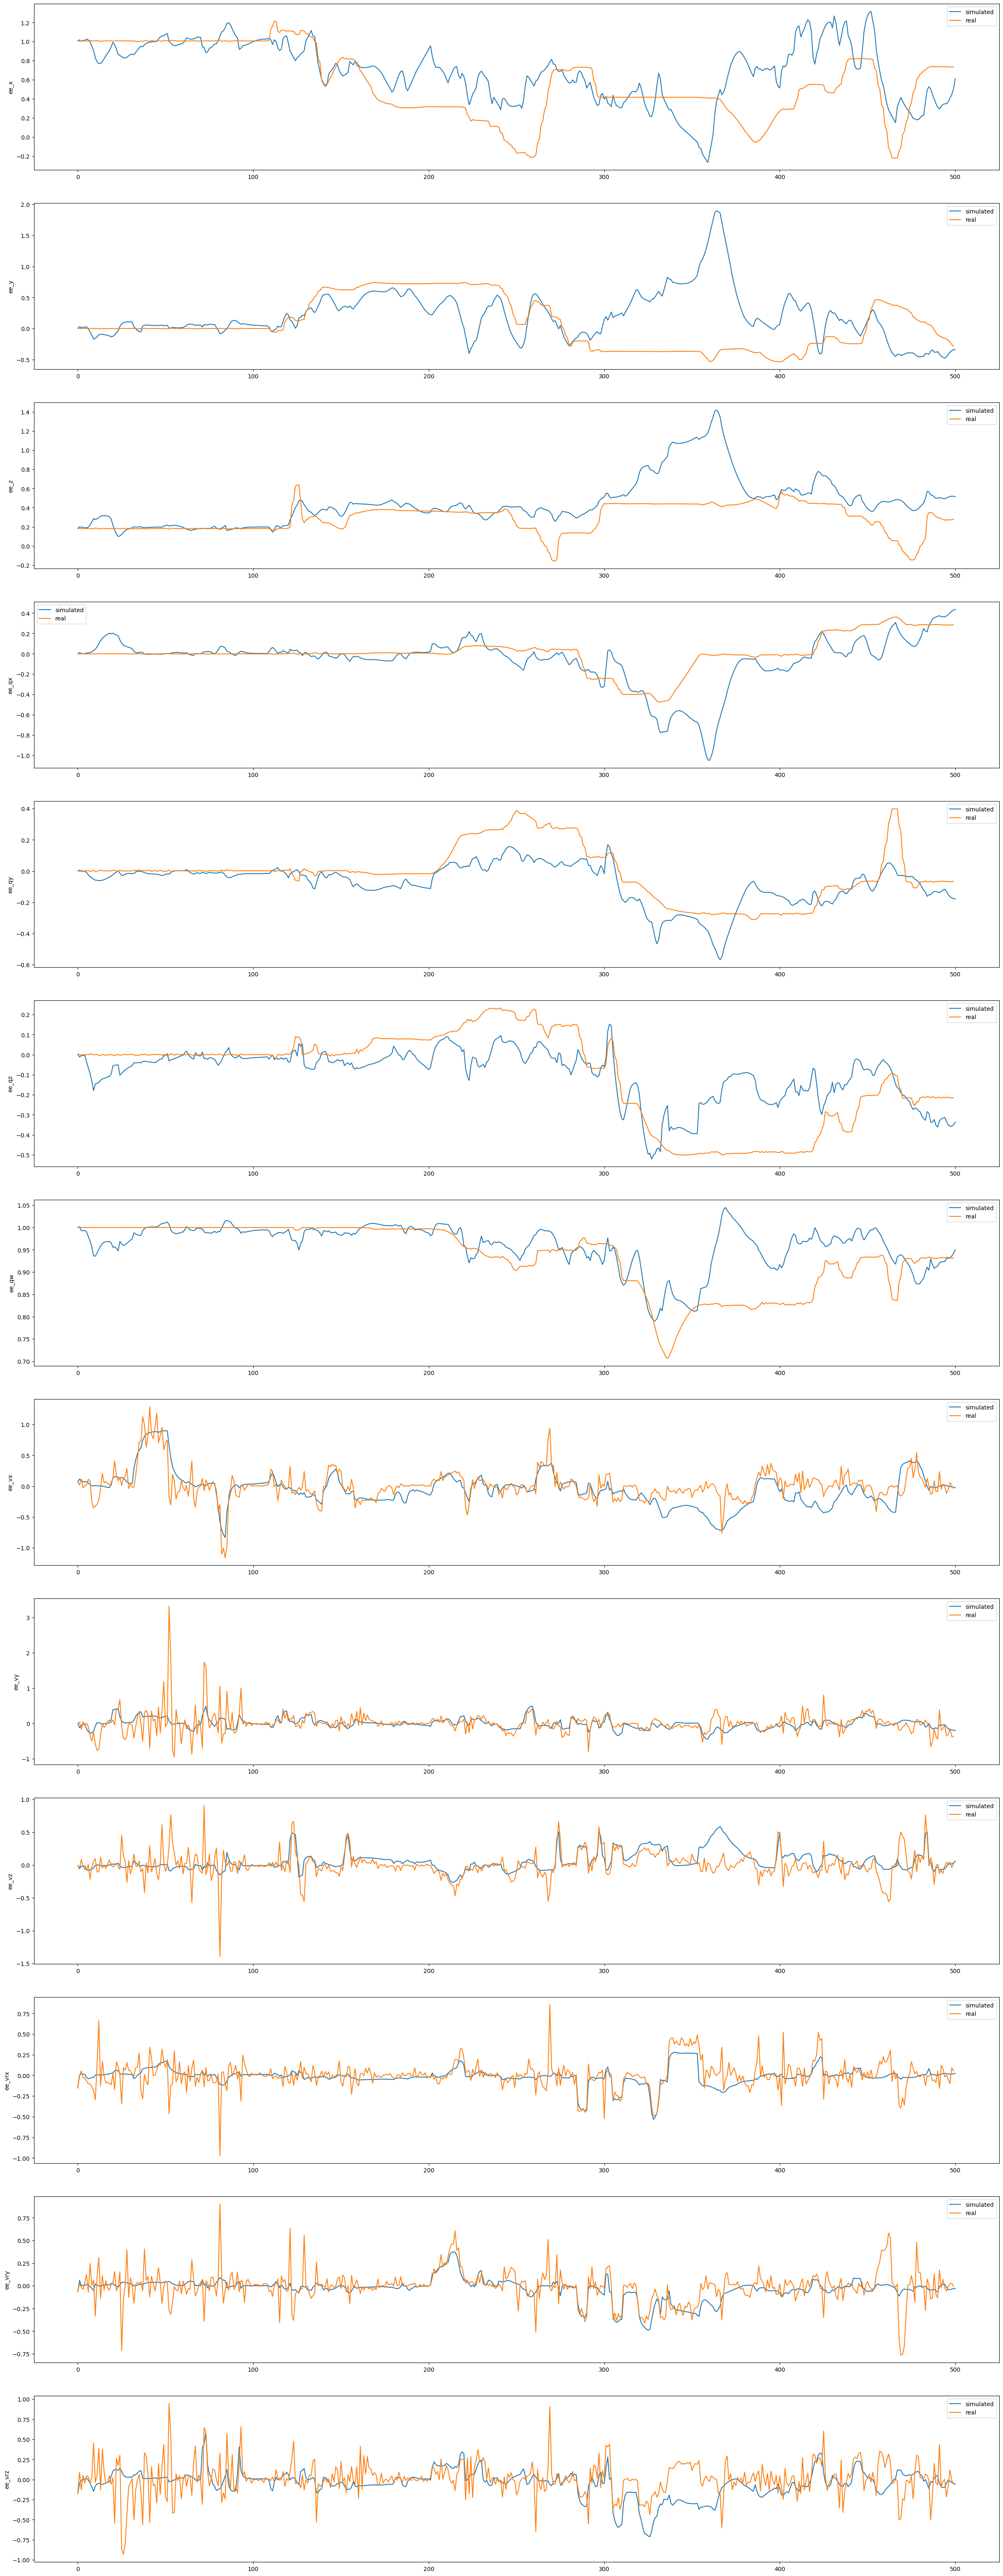

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R

from alrd.run_spot import SessionBuffer, DataBuffer, TransitionData, StateData, TimeData
from alrd.spot_gym.model.robot_state import SpotState

# params
steps = 500
start_idx = 400
end_idx = start_idx + steps

# load real data
real_data_path = "/home/bhoffman/Documents/MT FS24/active-learning-dynamics/collected_data/test20240730-174534/session_buffer.pickle"
with open(real_data_path, "rb") as file:
    real_data = pickle.load(file)

states = real_data.data_buffers[0].states

# cut data
states = states[start_idx:end_idx]

real_body_states = np.array([s.next_state.pose_of_body_in_vision for s in states])

real_ee_positions = np.array([s.next_state.pose_of_hand_in_body[0:3] for s in states])

real_ee_orentations = np.array([s.next_state.pose_of_hand_in_body[3:] for s in states])
# real_ee_orentations = R.from_quat(real_ee_orentations_pre).as_euler('xyz', degrees=True)

real_ee_velocities = np.array([s.next_state.velocity_of_hand_in_body for s in states])

real_arm_joint_positions = [s.next_state.arm_joint_positions for s in states]


# load simlauted trajectory data
file_path = "/home/bhoffman/Documents/MT FS24/active-learning-dynamics/alrd/spot_simulator/generated_trajectories/trajectory_20240802-174312.pickle"
with open(file_path, "rb") as file:
    data = pickle.load(file)
    
with_base = False

if with_base:
    base_x = [d[0] for d in data]
    base_y = [d[1] for d in data]
    heading = [d[2] for d in data]
    base_vx = [d[3] for d in data]
    base_vy = [d[4] for d in data]
    base_vrot = [d[5] for d in data]
    ee_x = [d[6] for d in data]
    ee_y = [d[7] for d in data]
    ee_z = [d[8] for d in data]
    ee_rx = [d[9] for d in data]
    ee_ry = [d[10] for d in data]
    ee_rz = [d[11] for d in data]
    ee_vx = [d[12] for d in data]
    ee_vy = [d[13] for d in data]
    ee_vz = [d[14] for d in data]
    ee_vrx = [d[15] for d in data]
    ee_vry = [d[16] for d in data]
    ee_vrz = [d[17] for d in data]
    sh0 = [d[18] for d in data]
    sh1 = [d[19] for d in data]
    el0 = [d[20] for d in data]
    el1 = [d[21] for d in data]
    wr0 = [d[22] for d in data]
    wr1 = [d[23] for d in data]


else:
    ee_x = [d[0] for d in data]
    ee_y = [d[1] for d in data]
    ee_z = [d[2] for d in data]
    ee_qx = [d[3] for d in data]
    ee_qy = [d[4] for d in data]
    ee_qz = [d[5] for d in data]
    ee_qw = [d[6] for d in data]
    ee_vx = [d[7] for d in data]
    ee_vy = [d[8] for d in data]
    ee_vz = [d[9] for d in data]
    ee_vrx = [d[10] for d in data]
    ee_vry = [d[11] for d in data]
    ee_vrz = [d[12] for d in data]
    # sh0 = [d[12] for d in data]
    # sh1 = [d[13] for d in data]
    # el0 = [d[14] for d in data]
    # el1 = [d[15] for d in data]
    # wr0 = [d[16] for d in data]
    # wr1 = [d[17] for d in data]

    # plot and label
    fig, axs = plt.subplots(13, 1, figsize=(30, 80))

    axs[0].plot(ee_x, label="simulated")
    axs[0].plot(real_ee_positions[:,0], label="real")
    axs[1].plot(ee_y, label="simulated")
    axs[1].plot(real_ee_positions[:,1], label="real")
    axs[2].plot(ee_z, label="simulated")
    axs[2].plot(real_ee_positions[:,2], label="real")

    axs[3].plot(ee_qx, label="simulated")
    axs[3].plot(real_ee_orentations[:,0], label="real")
    axs[4].plot(ee_qy, label="simulated")
    axs[4].plot(real_ee_orentations[:,1], label="real")
    axs[5].plot(ee_qz, label="simulated")
    axs[5].plot(real_ee_orentations[:,2], label="real")
    axs[6].plot(ee_qw, label="simulated")
    axs[6].plot(real_ee_orentations[:,3], label="real")

    axs[7].plot(ee_vx, label="simulated")
    axs[7].plot(real_ee_velocities[:,0], label="real")
    axs[8].plot(ee_vy, label="simulated")
    axs[8].plot(real_ee_velocities[:,1], label="real")
    axs[9].plot(ee_vz, label="simulated")
    axs[9].plot(real_ee_velocities[:,2], label="real")
    axs[10].plot(ee_vrx, label="simulated")
    axs[10].plot(real_ee_velocities[:,3], label="real")
    axs[11].plot(ee_vry, label="simulated")
    axs[11].plot(real_ee_velocities[:,4], label="real")
    axs[12].plot(ee_vrz, label="simulated")
    axs[12].plot(real_ee_velocities[:,5], label="real")

    # axs[12].plot(sh0, label="simulated")
    # axs[12].plot([p[0] for p in real_arm_joint_positions[:]], label="real")
    # axs[13].plot(sh1, label="simulated")
    # axs[13].plot([p[1] for p in real_arm_joint_positions[:]], label="real")
    # axs[14].plot(el0, label="simulated")
    # axs[14].plot([p[2] for p in real_arm_joint_positions[:]], label="real")
    # axs[15].plot(el1, label="simulated")
    # axs[15].plot([p[3] for p in real_arm_joint_positions[:]], label="real")
    # axs[16].plot(wr0, label="simulated")
    # axs[16].plot([p[4] for p in real_arm_joint_positions[:]], label="real")
    # axs[17].plot(wr1, label="simulated")
    # axs[17].plot([p[5] for p in real_arm_joint_positions[:]], label="real")

    for ax in axs:
        ax.legend()

    # add labels
    axs[0].set(ylabel="ee_x")
    axs[1].set(ylabel="ee_y")
    axs[2].set(ylabel="ee_z")
    axs[3].set(ylabel="ee_qx")
    axs[4].set(ylabel="ee_qy")
    axs[5].set(ylabel="ee_qz")
    axs[6].set(ylabel="ee_qw")
    axs[7].set(ylabel="ee_vx")
    axs[8].set(ylabel="ee_vy")
    axs[9].set(ylabel="ee_vz")
    axs[10].set(ylabel="ee_vrx")
    axs[11].set(ylabel="ee_vry")
    axs[12].set(ylabel="ee_vrz")
    # axs[12].set(ylabel="sh0")
    # axs[13].set(ylabel="sh1")
    # axs[14].set(ylabel="el0")
    # axs[15].set(ylabel="el1")
    # axs[16].set(ylabel="wr0")
    # axs[17].set(ylabel="wr1")

    plt.show()
